**Importing all the Libraries**

In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [128]:
# Uploading Dataset to the Drive
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard (1).csv


**Data Engineering/Data Pre-processing**

In [177]:
#Putting Dataset into Dataframe 
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [130]:
data.shape

(284807, 31)

In [131]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [132]:
#optimizeing the memory usage of a data set by downcasting numeric columns to the most memory efficient data type

def optimize_numeric_columns(data):
  for col in data.columns:
    if data[col].dtype == "int64":
      data[col] = pd.to_numeric(data[col], downcast="integer")
    elif data[col].dtype == "float64":
      data[col] = pd.to_numeric(data[col], downcast="float")
optimize_numeric_columns(data)


In [133]:
#Droping Duplicate Data
print(data.duplicated().sum())
data.drop_duplicates(inplace = True)

1081


In [134]:
#Checking Null Values and Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float32
 1   V1      283726 non-null  float32
 2   V2      283726 non-null  float32
 3   V3      283726 non-null  float32
 4   V4      283726 non-null  float32
 5   V5      283726 non-null  float32
 6   V6      283726 non-null  float32
 7   V7      283726 non-null  float32
 8   V8      283726 non-null  float32
 9   V9      283726 non-null  float32
 10  V10     283726 non-null  float32
 11  V11     283726 non-null  float32
 12  V12     283726 non-null  float32
 13  V13     283726 non-null  float32
 14  V14     283726 non-null  float32
 15  V15     283726 non-null  float32
 16  V16     283726 non-null  float32
 17  V17     283726 non-null  float32
 18  V18     283726 non-null  float32
 19  V19     283726 non-null  float32
 20  V20     283726 non-null  float32
 21  V21     28

Class Split
0    283253
1       473
Name: Class, dtype: int64


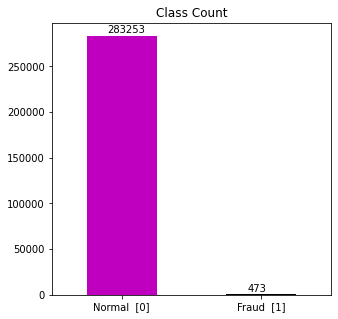

In [135]:
#Class Balance
print('Class Split')
print(data['Class'].value_counts())
diff_class = data['Class'].value_counts()
diff_class.plot(kind='bar', color=['m', 'k'], figsize=(5, 5))
plt.xticks(range(2), ['Normal  [0]', 'Fraud  [1]'], rotation=0)
for i, v in enumerate(diff_class):
    plt.text(i-0.1, v+3000, str(v))
plt.title('Class Count')
plt.show()

Correlation Heatmap


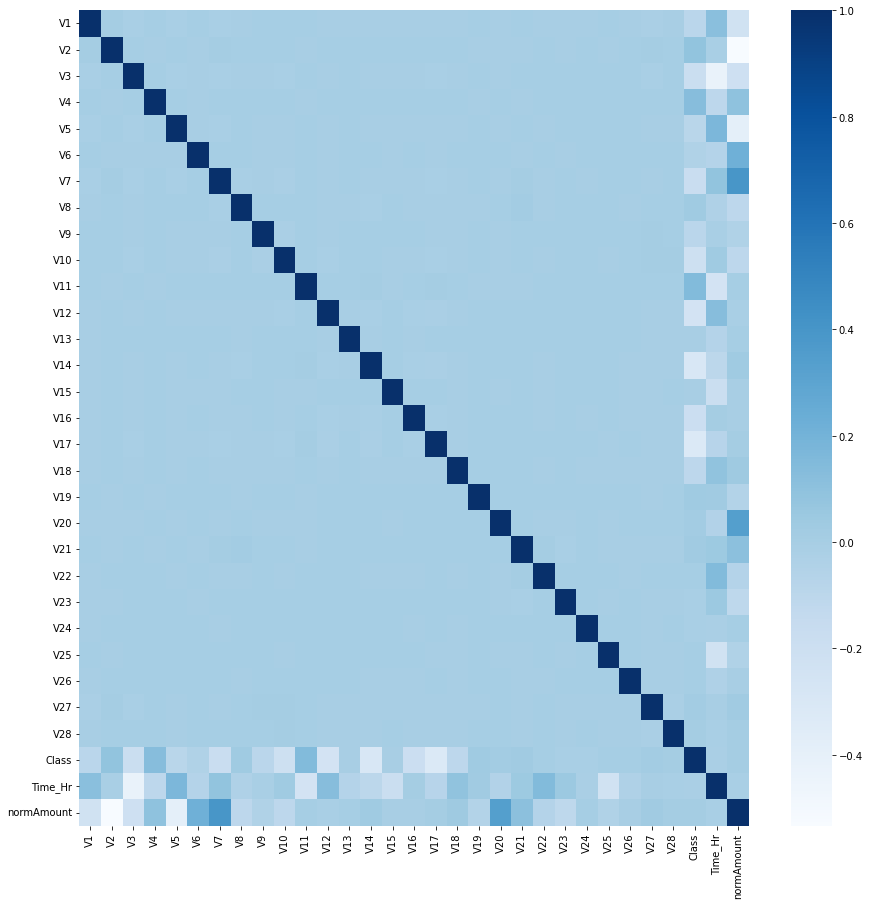

In [174]:
#Correlation HeatMap
plt.figure(figsize=(15,15))
cor = data.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Blues)
print("Correlation Heatmap")
plt.show()

Time variable
284802    47.996113
284803    47.996387
284804    47.996666
284805    47.996666
284806    47.997776
Name: Time_Hr, dtype: float32


Text(0, 0.5, '# transactions')

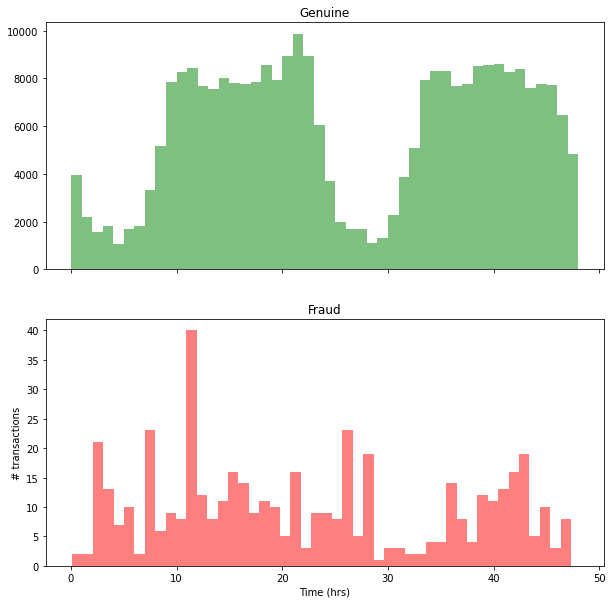

In [138]:
#plot Time to see if there is any trend
print("Time variable")
data["Time_Hr"] = data["Time"]/3600 # convert to hours
print(data["Time_Hr"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(10,10))
ax1.hist(data.Time_Hr[data.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(data.Time_Hr[data.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

In [139]:
#Create x and y variables
x = data.drop('Class', axis=1).to_numpy()
Y = data['Class'].to_numpy()

#Create Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.2,stratify=Y,random_state = 100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train_smt)
x_test2 = sc.transform(x_test)

#Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [140]:
#Class Balance - Test Data
print('Train Data - Class Split')
num_zero = (y_train_smt == 0).sum()
num_one = (y_train_smt == 1).sum()
print('Class 0 -',  num_zero)
print('Class 1 -',  num_one)

Train Data - Class Split
Class 0 - 226602
Class 1 - 226602


**Linear Discriminant Classifier**

In [141]:
#Base LDA
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('LDA', LinearDiscriminantAnalysis())]: 
    method.fit(x_train2,y_train_smt)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict)) 


Estimator: LDA
[[55919   732]
 [   17    78]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56651
           1       0.10      0.82      0.17        95

    accuracy                           0.99     56746
   macro avg       0.55      0.90      0.58     56746
weighted avg       1.00      0.99      0.99     56746



**Logistic Regression**

In [142]:
#Model
from sklearn.linear_model import LogisticRegression
#Base Logistical Regression Model
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('LogReg', LogisticRegression(solver='lbfgs',class_weight='balanced',
                                               random_state=100))]: 
    method.fit(x_train2,y_train_smt)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))   


Estimator: LogReg
[[56169   482]
 [    9    86]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56651
           1       0.15      0.91      0.26        95

    accuracy                           0.99     56746
   macro avg       0.58      0.95      0.63     56746
weighted avg       1.00      0.99      0.99     56746



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Neural Network - Multi-layer Perceptron classifier**

In [179]:
#Formulas can be applied to the columns of a Data Frame
data['logAmount'] = np.log(data['Amount']+1)


In [180]:
from sklearn.preprocessing import StandardScaler
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape (-1,1))
data = data.drop (['Time', 'Amount','logAmount'], axis = 1);

In [181]:
# We separate the data into two arrays, one with the X variables and the other with the y variables.
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']
len(y[y.Class ==1]);

In [182]:
# Resampling --> For cases where the system is unbalanced like this

# Undersampling --> Delete cases of the majority type
# Oversampling --> Synthetically replicate minority cases
# SMOTE --> A combination technique of the previous two
# We count the number of cases of fraud that exist!
number_records_fraud = len(data[data.Class==1])

# And we extract the indices where the fraud and non-fraud cases are
fraud_indices = np.array(data[data.Class==1].index)
normal_indices = np.array(data[data.Class==0].index)

In [183]:
# We randomly obtain a number of non-fraud indices, equal to the fraud
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False )

# We unite in a single array the fraud indices with those of non-fraud chosen randomly
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])


In [184]:
# Now we choose the values of these indices
#under_sample_data = data.iloc[under_sample_indices]
under_sample_data = data.iloc[:len(under_sample_indices)]
under_sample_data
# Separate the X from the y again
X_undersample = under_sample_data.iloc [:, under_sample_data.columns != 'Class'];
y_undersample = under_sample_data.iloc [:, under_sample_data.columns == 'Class'];

In [185]:
under_sample_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,-1.644979,1.185169,0.846530,-1.174375,1.845442,4.786769,-1.388912,-2.132958,0.587086,-0.047873,...,2.849081,-1.322193,0.096048,0.979467,0.434882,0.380888,0.296508,-0.069829,0,-0.320765
980,1.304437,-0.709851,-0.112405,-2.207912,-0.355304,0.170636,-0.518525,0.050055,2.470382,-1.728971,...,0.065871,0.610271,-0.375163,-1.229720,0.948828,-0.485356,0.111789,0.012819,0,-0.249479
981,-1.638212,0.395044,1.487210,-0.536682,1.691993,-0.610509,0.479928,-0.209453,-0.161525,-0.358540,...,-0.405072,-0.800599,-0.501077,-0.654136,0.249438,0.058013,-0.026457,-0.112420,0,-0.305332
982,1.003736,-0.124486,0.550524,0.707663,0.114724,1.142201,-0.312824,0.418347,0.369756,-0.400072,...,-0.080938,0.095345,0.167729,-0.594204,0.103796,0.375503,0.050058,0.003841,0,-0.287261


In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2, random_state = 0)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split (X_undersample,y_undersample, test_size = 0.2, random_state = 0)

In [187]:
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier

In [188]:
MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
MLPC.fit(X_train_under, y_train_under)
y_pred = MLPC.predict(X_test)
# Get recall values
recall_acc = recall_score (y_test,y_pred)
recall_acc

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5148514851485149